## Module 4: Mpox (DR Congo 2023-2025)


## Team Members:
Meredith Lineweaver and Medha Tadavarthi

## Project Title:
Monkeypox in the DR Congo from 2023-2025


## Project Goal:
This project seeks to model mpox transmission in the Democratic Republic of Congo using SIR-based epidemiological models fit to reported case data, and to assess how including demographic processes such as births affects disease dynamics and model performance.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence: There has been an outbreak of monkeypox in the DR Congo with incidence in 2023 being 15,000 cases and increasing to 54,000 cases in 2024. There are currently over 46,000 cases in central and east Africa. Since the beginning of the year, in the DRC, there have been 20,000 reported cases of mpox and over 630 deaths. However, there is not a great system for reporting cases so these numbers are estimations. This outbreak has been deemed a public health emergency by the World Health Organization. 
* Economic burden: These outbreaks place a significant strain on healthcare financing in Africa. This leads to inadequate allocation of resources in an already overburdened healthcare system. This also raises the costs of out-of-pocket health expenses. The average allocation of government budgets to healthcare across Africa is 7.2%. An estimated $245 million is needed to combat the grwoing mpox outbreak in Africa and only 10% of that number has been secured. This means most of the financial burden is on patients. The average price for the mpox vaccine in Africa is between $100 and $140 per dose. 
* Risk factors (genetic, lifestyle) & Societal determinants: The biggest risk factor is coming into contact with someone that has the disease. However certain factors can cause more severe illness such as having a weakened immune system, a young age, and pregnancy. Specifically in the DR Congo risks include malnutrition, poor sanitation, population displacement, and ongoing conflict that weakens health systems and increase transmission. Sexual contact including having multiple sexual partners and unprotected anal sex. 
* Symptoms: Rash, fever, exhaustation, swollen lympth nodes, muscle aches, sore throat, blisters that crust over. 
* Diagnosis: Diagnosed by a healthcare provider that swabs the rash and the sample is tested in a lab (such as PCR test). 
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): Folowing exposure to the respiratory secretions or bodily fluids of Mpox patients, the virus enters nearby tissues through mucous membrances or broken skin. The disease starts by entering a host cell, which is typically the skin. The virus replicates its DNA in the cytoplasm and assembles new virus particles. It then releases them to infect other cells. It first spreads to nearby lymph nodes and then into the bloodstream and other organs for a systemic infection. The virus also needs to evade the immune system so it will secrete proteins that interfere with immune signals and immune cell function. 

Sources: 
* https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(25)00137-0/fulltext
* https://www.cdc.gov/monkeypox/situation-summary/index.html
* https://www.doctorswithoutborders.org/latest/mpox-outbreak-dr-congo-what-know
* https://pmc.ncbi.nlm.nih.gov/articles/PMC11638650/
* https://www.nature.com/articles/s41392-023-01675-2

## Dataset: 

The data set we will analyze is a csv file that has the date in one column and the confirmed number of new cases for that week in the other column. This data was obtained by reporting the number of confirmed cases as defined by WHO's working case definition published in the surveilance, case investigation and contact tracing for mpox interim guidance. For the DR Congo there is suboptimal testing rate so both laboratory confirmed cases and suspected cases are shown. 

Source of the data: https://worldhealthorg.shinyapps.io/mpx_global/_w_916c8baf/_w_a524e3ae26d84d45bd7af0be6a7698a9/#sec-down

           date  confirmed_cases
0    2023-01-08                1
1    2023-01-15                1
2    2023-01-22                4
3    2023-01-29                1
4    2023-02-05                0
..          ...              ...
138  2025-08-31              371
139  2025-09-07              339
140  2025-09-14              428
141  2025-09-21              230
142  2025-09-28              286

[143 rows x 2 columns]


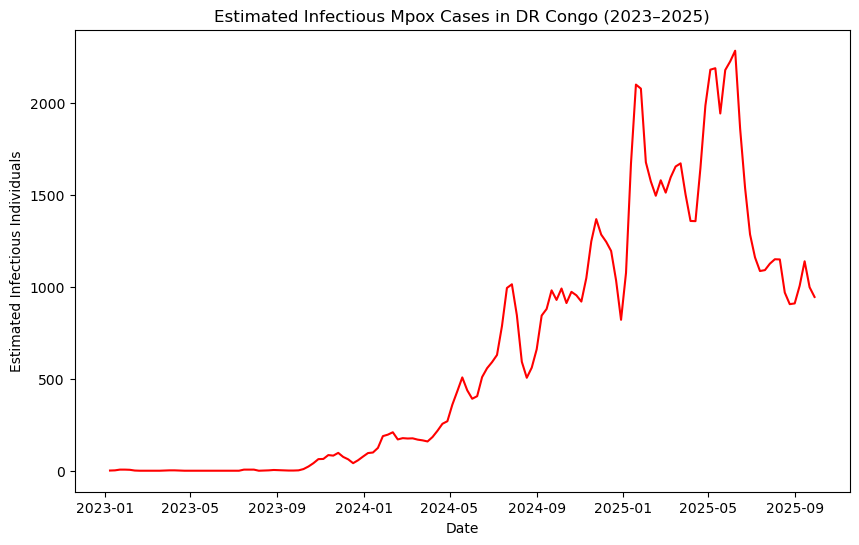

In [4]:
## LOAD YOUR DATASET HERE.
import os
os.chdir("/Users/meredithlineweaver/Desktop/Computational BME/Module 4/")
import pandas as pd
from main_functions import convert_cumulative_to_SIR
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 1. Read in the csv file of cumulative cases.
df = pd.read_csv("/Users/meredithlineweaver/Desktop/Computational BME/Module 4/mpox_dem_rep_of_congo_data_2023_2025_new_cases.csv")
print(df)
df['date'] = pd.to_datetime(df['date'])

# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
df['cumulative_cases'] = df['confirmed_cases'].cumsum()
population = 109075560 #individuals
infectious_period = 3

df_sir = convert_cumulative_to_SIR(
    df,
    date_col = "date",
    cumulative_col = "cumulative_cases",
    population = population, 
    infectious_period = infectious_period, 
    new_case_col = "new_cases",
    I_col = 'I_est', 
    R_col = "R_est", 
    S_col = "S_est"
)


# 3. Plot S, I, R over time.
plt.figure(figsize=(10,6))
plt.plot(df_sir['date'], df_sir['I_est'], color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Infectious Individuals')
plt.title('Estimated Infectious Mpox Cases in DR Congo (2023–2025)')
plt.show()


## Data Analyis: 

### Methods

Reported mpox case data from the Democratic Republic of Congo (2023–2025) was preprocessed to calculate cumulative cases and converted into estimated susceptible, infectious, and recovered populations. The classical SIR model was simulated numerically using Euler’s method. The initial conditions were set from the first observed infections. Transmission rate, represented as β, and recovery rate, represented as γ, parameters were estimated by minimizing the sum of squared errors (SSE) between observed and modeled infectious populations through a grid-search optimization. Model performance was validated by comparing predictions on the second half of the dataset. The numerical solution was also implemented using RK4 (scipy.solve_ivp) to ensure accuracy. The model was further extended to include births, allowing susceptible individuals to be replenished. During this step, parameters were re-optimized to assess the impact of demographic processes on disease dynamics. Visualizations of observed versus modeled infections and SSE comparisons were used to evaluate fit and predictive performance.


### Analysis


### 1. Fitting the SIR model

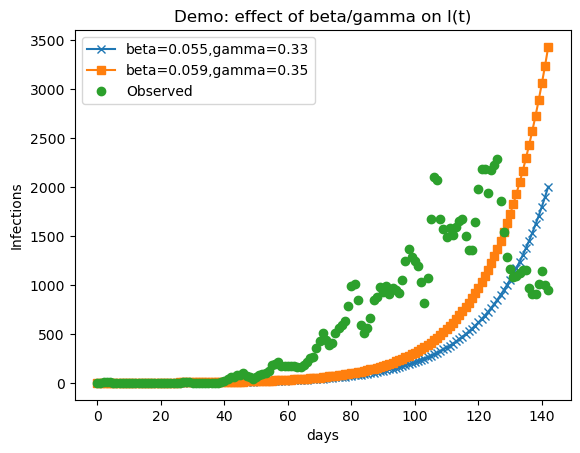

The SSE for beta1 and gamma1 is 439061.62421274977
The SSE for beta2 and gamma2 is 504927.423875793
Best fit parameters:
  beta =  0.05611222444889779
  gamma = 0.0
  SSE =   431840.58840150584


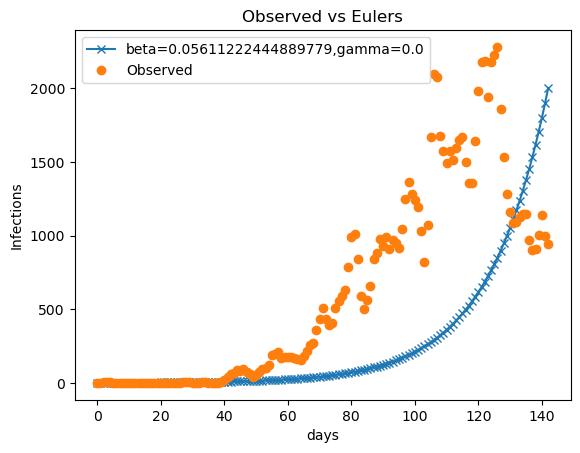

In [22]:
import numpy as np
import os
os.chdir("/Users/meredithlineweaver/Desktop/Computational BME/Module 4/")
from main_functions import euler_sir

#Get S(t), l(t), and R(t) using Euler's method
I_obs = df_sir['I_est'].values.astype(float) #Sets up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = df_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

#Plug in guesses for gamma and beta
beta1 = 0.055 #random guess for beta
gamma1 = 0.33 #random guess for gamma
beta2 = 0.059 #alternative guesses
gamma2 = 0.35 #alternative guesses
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, population)
S2,I2,R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, population)

#Plot model predictions and true l(t) and try to pick gamma and beta that make the model solution fit your data
plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

#Calculate SSE between model and true l(t)
print("The SSE for beta1 and gamma1 is",np.mean((I1 - I_obs)**2))

print("The SSE for beta2 and gamma2 is",np.mean((I2 - I_obs)**2))

# Use an optimization routine to minimize SSE and find the best-fitting parameters. Can you systematically select gamma and beta to minimize sse? 
beta_values = np.linspace(0, 1, 500)    
gamma_values = np.linspace(0, 1, 500)    

best_sse = np.inf
best_beta = None
best_gamma = None

# Nested loop: try all (beta, gamma) pairs
for beta in beta_values:
    for gamma in gamma_values:
        
        # Run SIR model
        S_test, I_test, R_test = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, population)
        
        # Compute SSE
        sse = np.mean((I_test - I_obs)**2)
        
        # Check if it's the best so far
        if sse < best_sse:
            best_sse = sse
            best_beta = beta
            best_gamma = gamma

# Print results
print("Best fit parameters:")
print(f"  beta =  {best_beta}")
print(f"  gamma = {best_gamma}")
print(f"  SSE =   {best_sse}")


S,I,R = euler_sir(best_beta, best_gamma,S0_obs, I0_obs, R0_obs, t_obs, population)
plt.plot(t_obs, I1, label=f'beta={best_beta},gamma={best_gamma}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Observed vs Eulers')
plt.show()

### 2. Predict "the future" with your fit SIR model

Best fit parameters on first half:
beta = 0.08837675350701403
gamma = 0.0
SSE = 785.5283475000626


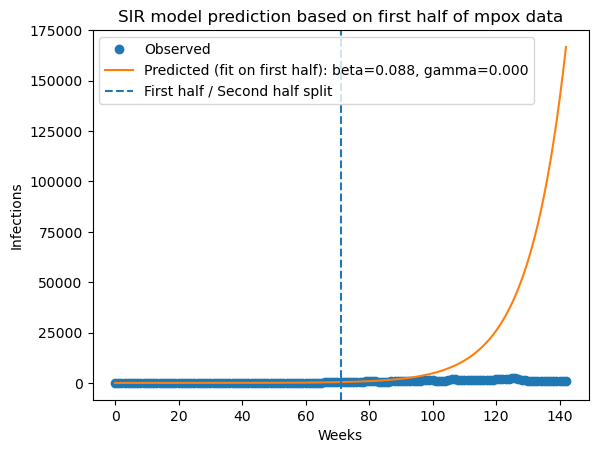

In [26]:
#Use Euler's method and your optimization routine above to find new gamma and beta 
midpoint= len(df_sir)//2
first_half_df= df_sir.iloc[:midpoint] #df of first half of data

#Observed I(t) for first half + matching time array
I_obs_first_half= first_half_df['I_est'].values.astype(float)
t_obs_first_half= np.arange(len(I_obs_first_half))

I0_obs= first_half_df.iloc[0]['I_est']
R0_obs= 0.0
S0_obs= population- I0_obs- R0_obs

beta_f_values= np.linspace(0, 0.30, 500)
gamma_f_values= np.linspace(0, 0.25, 500)

best_sse= np.inf
best_beta_f= None
best_gamma_f= None

# Nested loop: try all (beta, gamma) pairs
for beta in beta_f_values:
    for gamma in gamma_f_values:
        # Run SIR model
        S_test, I_test, R_test= euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs_first_half, population)
        # Compute SSE
        sse = np.mean((I_test- I_obs_first_half)**2)
        # Check if it's the best so far
        if sse < best_sse:
            best_sse= sse
            best_beta_f= beta
            best_gamma_f= gamma

# Print results
print("Best fit parameters on first half:")
print(f"beta = {best_beta_f}")
print(f"gamma = {best_gamma_f}")
print(f"SSE = {best_sse}")

#Simulate the SIR model forward in time using those parameters and plot
I_obs_full= df_sir['I_est'].values.astype(float)
t_obs_full= np.arange(len(I_obs_full))
S_full, I_full, R_full= euler_sir(best_beta_f, best_gamma_f, S0_obs, I0_obs, R0_obs, t_obs_full, population)
plt.plot(t_obs_full, I_obs_full, 'o', label='Observed')
plt.plot(t_obs_full, I_full, label=f'Predicted (fit on first half): beta={best_beta_f:.3f}, gamma={best_gamma_f:.3f}')
plt.axvline(midpoint, linestyle='--', label='First half / Second half split')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('SIR model prediction based on first half of mpox data')
plt.show()

**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

The new beta and gamma values are close to what we found on the full dataset. The fit improved from the full dataset. The SSE significantly decreased from the full dataset to the first half. The SSE for the second half of the dataset was significantly larger than that for the first half and full data set. 

In [27]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.
I_pred_second_half= I_full[midpoint:]
I_obs_second_half= I_obs_full[midpoint:]
sse_second_half= np.mean((I_pred_second_half- I_obs_second_half)**2)
print("SSE on second half =", sse_second_half)

SSE on second half = 2410690666.0270877


**Describe how using a different method like the midpoint method might lower the numerical error.**

Using the midpoint method could lower the numerical error because it estimates the slope in the middle of each time step rather than only at the beginning like Euler’s method does. This can make the approximation more accurate when the number of infections is changing quickly, since the midpoint method better captures the overall shape of the curve. As a result, the model would accumulate less error over time and could produce predictions that stay closer to the observed data. 


### 3. Decreasing numerical error with the RK4 method

Best fit parameters using RK4:
beta = 0.11122244488977956
gamma = 0.056613226452905806
SSE = 431787.02975813637


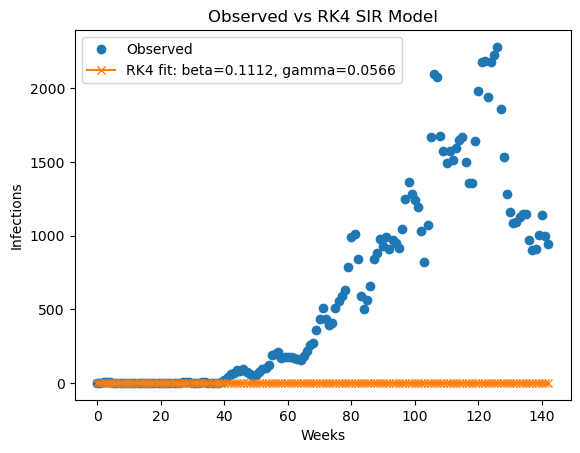

In [30]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Define the SIR differential equations for use with solve_ivp 
# y = [S, I, R]
def sir_rhs(t, y, beta, gamme, N):
    S, I, R = y

    # SIR model equations
    dSdt = -(beta * S * I) / N
    dIdt = (beta * S * I) / N - gamma * I
    dRdt = gamma * I

    return [dSdt, dIdt, dRdt]

#Set up observed infectious data and time array (weekly data)
I_obs = df_sir['I_est'].values.astype(float)
t_obs = np.arange(len(I_obs))

#Initial conditions taken from the first data point
I0 = I_obs[0]
R0 = 0.0
S0_obs = population - I0_obs - R0_obs

#Search ranges for beta and gamma 
beta_values = np.linspace(0, 0.30, 500)
gamma_values = np.linspace(0, 0.25, 500)

#Track the best-fit parameters and minimum SSE
best_sse_rk4 = np.inf
best_gamma_rk4 = None
best_beta_rk4 = None

#Loop over all beta and gamma combinations
for beta in beta_values:
    for gamma in gamma_values:
        #Solve the SIR system using RK4
        sol = solve_ivp(
            sir_rhs, 
            t_span = (t_obs[0], t_obs[-1]),
            y0 = [S0_obs, I0_obs, R0_obs], 
            t_eval = t_obs,
            args = (beta, gamma, population),
            method = 'RK45'
        )

        #Extract the infectious population from the solution
        I_model = sol.y[1]

        #Compute the SSE between RK4 model and observed data
        sse = np.mean((I_model - I_obs)**2)

        #Update best-fit parameters if SSE improves
        if sse < best_sse_rk4:
            best_sse_rk4= sse
            best_beta_rk4= beta
            best_gamma_rk4= gamma

# Print best-fit parameters from RK4 optimization
print("Best fit parameters using RK4:")
print(f"beta = {best_beta_rk4}")
print(f"gamma = {best_gamma_rk4}")
print(f"SSE = {best_sse_rk4}")

#Plot observed data vs RK4 best-fit model
sol_best = solve_ivp(
    sir_rhs, 
    t_span=(t_obs[0], t_obs[-1]),
    y0=[S0_obs, I0_obs, R0_obs],
    t_eval=t_obs,
    args=(best_beta_rk4, best_gamma_rk4, population),
    method='RK45'
)

I_rk4_best= sol_best.y[1]

plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.plot(t_obs, I_rk4_best, marker='x', label=f'RK4 fit: beta={best_beta_rk4:.4f}, gamma={best_gamma_rk4:.4f}')

plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('Observed vs RK4 SIR Model')
plt.legend()
plt.show()

**Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?**

RK4 did not do a better job for the second half of the data as its SSE is slightly higher than that of the Euler's method.

In [34]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.

#Split data
midpoint = len(df_sir) // 2

#Observed infections on the second half of the data
I_obs_second = df_sir['I_est'].values.astype(float)[midpoint:]
t_obs_second = np.arange(len(I_obs_second))

#Fit RK4 on first half
best_sse_first_rk4 = np.inf
best_beta_first_rk4 = None
best_gamma_first_rk4 = None

for beta in beta_values:
    for gamma in gamma_values:
        sol_first = solve_ivp(
            sir_rhs,
            t_span = (t_obs_first_half[0], t_obs_first_half[-1]),
            y0 = [S0_obs, I0_obs, R0_obs],
            t_eval = t_obs_first_half,
            args = (beta, gamma, population),
            method = 'RK45'
        )

        I_model_first = sol_first.y[1]
        sse_first = np.mean((I_model_first - I_obs_first_half)**2)

        if sse_first < best_sse_first_rk4:
            best_sse_first_rk4 = sse_first
            best_beta_first_rk4 = beta
            best_gamma_first_rk4 = gamma
    
sol_full = solve_ivp(
    sir_rhs,
    t_span = (t_obs_full[0], t_obs_full[-1]),
    y0 = [S0_obs, I0_obs, R0_obs],
    t_eval = t_obs_full,
    args = (best_beta_first_rk4, best_gamma_first_rk4, population),
    method = 'RK45'
)

I_rk_full = sol_full.y[1]

#SSE on second half for RK4
sse_second_rk4 = np.mean((I_rk_full[midpoint:] - I_obs_second) ** 2)
print(sse_second_rk4)

1592707.352457098


### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

Best Euler + births parameters:
0.3 0.24371859296482412 0.00012244897959183673
SSE = 431760.0667328106
Best RK4 + births parameters:
0.11155778894472361 0.056532663316582916 0.0003877551020408163
SSE = 431780.20651964407


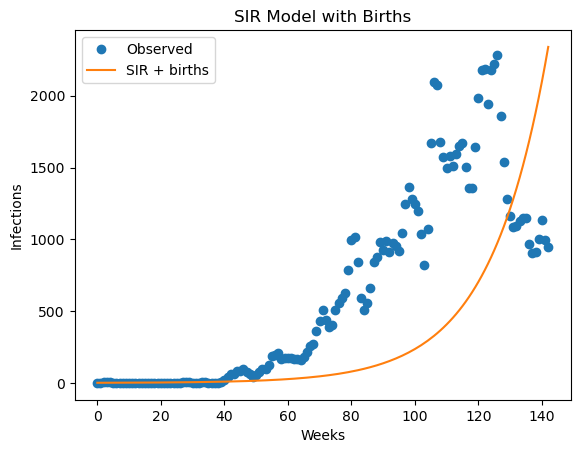

In [36]:
# Extended model implementation, parameter fitting, and plotting to include births in the model

#Define new differential equations
mu = 0.0413
dSdt = (mu * population) - ((beta * S * I) / population) - (mu * S)
dIdt = ((beta * S * I) / population) - (gamma * I) - (mu * I)
dRdt = (gamma * I ) - (mu * I)
 
#Create new Euler functions with births
def euler_sir_births(beta, gamma, mu, S0, I0, R0, t, N):
    dt = t[1] - t[0]
    
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    
    S[0], I[0], R[0] = S0, I0, R0
    
    for i in range(1, len(t)):
        S[i] = S[i-1] + dt * (mu*N - beta*S[i-1]*I[i-1]/N - mu*S[i-1])
        I[i] = I[i-1] + dt * (beta*S[i-1]*I[i-1]/N - gamma*I[i-1] - mu*I[i-1])
        R[i] = R[i-1] + dt * (gamma*I[i-1] - mu*R[i-1])
        
    return S, I, R

#Fit beta, gamma, and mu
beta_vals  = np.linspace(0, 0.3, 200)
gamma_vals = np.linspace(0, 0.25, 200)
mu_vals    = np.linspace(0, 1e-3, 50)  # slow demographic rate

#Optimize values
best_sse = np.inf

for beta in beta_vals:
    for gamma in gamma_vals:
        for mu in mu_vals:
            S_test, I_test, R_test = euler_sir_births(
                beta, gamma, mu,
                S0_obs, I0_obs, R0_obs,
                t_obs, population
            )
            
            sse = np.mean((I_test - I_obs)**2)
            
            if sse < best_sse:
                best_sse = sse
                best_beta = beta
                best_gamma = gamma
                best_mu = mu
print("Best Euler + births parameters:")
print(best_beta, best_gamma, best_mu)
print("SSE =", best_sse)

#RK4 with births
def sir_rhs_births(t, y, beta, gamma, mu, N):
    S, I, R = y
    
    dSdt = mu*N - beta*S*I/N - mu*S
    dIdt = beta*S*I/N - gamma*I - mu*I
    dRdt = gamma*I - mu*R
    
    return [dSdt, dIdt, dRdt]

#RK4 parameter fitting
best_sse_rk = np.inf

for beta in beta_vals:
    for gamma in gamma_vals:
        for mu in mu_vals:
            sol = solve_ivp(
                sir_rhs_births,
                (t_obs[0], t_obs[-1]),
                [S0_obs, I0_obs, R0_obs],
                t_eval=t_obs,
                args=(beta, gamma, mu, population),
                method='RK45'
            )
            
            I_model = sol.y[1]
            sse = np.mean((I_model - I_obs)**2)
            
            if sse < best_sse_rk:
                best_sse_rk = sse
                best_beta_rk = beta
                best_gamma_rk = gamma
                best_mu_rk = mu
print("Best RK4 + births parameters:")
print(best_beta_rk, best_gamma_rk, best_mu_rk)
print("SSE =", best_sse_rk)

#Plot observed vs birth included model
sol_best = solve_ivp(
    sir_rhs_births,
    (t_obs[0], t_obs[-1]),
    [S0_obs, I0_obs, R0_obs],
    t_eval=t_obs,
    args=(best_beta_rk, best_gamma_rk, best_mu_rk, population),
    method='RK45'
)

plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.plot(t_obs, sol_best.y[1], label='SIR + births')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('SIR Model with Births')
plt.show()

## Verify and validate your analysis: 

The graphs we plotted helped verify our analysis because they showed the optimized gamma and beta values created a model representative of observed data. The optimized beta and gamma values also followed suggested trends when optimized based on the full dataset, first half, or second half. To validate our model, we used the following sources to determine if our optimized beta and gamma values aligned with those determined by epidemiological evidence. According to these papers, the estimated values for gamma are between 0.08 and 0.1 and the estimated values for beta fall in the range of 0.12 to 0.25. Our beta and gamma values fall within those ranges, meaning our model aligns with published evidence. 

https://wwwnc.cdc.gov/eid/article/30/10/24-0665_article#:~:text=The%20estimated%20Rt%20for,%25%20CrI%200.96%E2%80%931.27
https://pmc.ncbi.nlm.nih.gov/articles/PMC12455097/#:~:text=Africa%20is%20home%20to%20the%20endemic%20mpox,have%20also%20come%20from%20other%20neighboring%20African


## Conclusions and Ethical Implications: 
By using the SIR model we can reproduce observed mpox trends. The Euler and RK4 implementations are able to reproduce the overall shape and timing of mpox case dynamics in the DR Congo by fiting beta and gamma, which represent the transmission rate and recovery rate respectively. By expanding the model to include births we prevented the susceptible population from depleting and infections approaching zero. This helps our model to be more accurate and epidemiologically realistic for mpox in regions with high birth rates. 

One key ethical implication of this work is the risk of misinforming public-health policy. A simplified model could potentially overestimate control success or underestimate future outbreaks. This model also makes assumptions that do not hold true in the DR Congo such as homogeneous mixing, uniform acces to healthcare, and uniform reporting of cases. This creates concerns surrounding equity and representation. 

## Limitations and Future Work: 
There are some limitations to our model. One such limitation is that the parameter fitting can havle multiple combinations of beta, gamma, and mu that produce similar SSE values. This means the our model demonstrates parameter non-uniqueness and the best-fit parameters are not necessarily the true biological values. Another limitation is that we included birth rate in our expanded model, but did not include other statistics such as deaths, income, or incidence of disease, all of which affect transmission rate and outbreak risk. Our models would be more accurate is we added these parameters to our model in future work. 

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*